# Matplotlib Fundamentals

Matplotlib is a popular data visualization library in Python and is often used in publications. It was originally built to mimic the functionality of plotting with [Matlab][0]. 

## Two Interfaces
There are two separate ways to interface with Matplotlib. One is called the **state-machine environment** and the other is with an **object-oriented** approach. The state-machine environment (known as **pyplot** from here on out) is a complex term for saying that Matplotlib implicitly handles some of the plotting for you. 

The **object-oriented** approach gives you full control over each element of the plot and is the more Pythonic way of interacting with Matplotlib. It is suggested you use the object-oriented approach. Most examples may be reproduced with either approach, but the object-oriented approach is explicit and, in my opinion, easier to determine what is happening.

### Using only the object-oriented approach
This notebook only uses the object-oriented approach, as attempting to learn both at the start is not necessary and confusing. Many examples online use pyplot so it is something that you will eventually need to understand. Thankfully, much of the code between each approach looks quite similar when making a single plot.

## Anatomy of a Figure

![][3]

There is a hierarchy you must understand when plotting with Matplotlib. The highest and outermost part of a plot is the **Figure**. The Figure contains all the other plotting elements. Typically, you do not interact with it much. Inside the Figure is the **Axes**. This is the actual plotting surface that you normally would refer to as a 'plot'. 

A Figure may contain any number of these **Axes**. The **Axes** is a container for all of the other physical pixels that get drawn onto your screen. This includes the x and y axis, lines, text, points, legends, images, etc... 

### Axes is a confusing word
The term **Axes** is not actually plural and does not mean more than one axis. It literally stands for a single 'plot'. It's unfortunate that this fundamental element has a name that is so confusing.

[0]: https://en.wikipedia.org/wiki/MATLAB
[1]: http://matplotlib.org
[2]: http://matplotlib.org/faq/usage_faq.html
[3]: images/figax.png

## Embedding plots into Jupyter Notebooks
To use embed plots created from matplotlib in a Jupyter Notebook you need to run the magic command `%matplotlib inline`. This will embed your matplotlib plots into the output of the cells. If you don't do this, you will have to call the `show` method from your Figure object, which produces a plot in a separate window.

In [2]:
%matplotlib inline

### Importing the pyplot module
Importing matplotlib into your workspace is done a little differently than NumPy or Pandas. You rarely will import matplotlib itself directly like this:

```
>>> import matplotlib
```

The above is perfectly valid code, but the matplotlib developers decided not to put all the main functionality in the top level module. 

### The difference between importing Pandas and Matplotlib
When you `import pandas as pd`, you get access to nearly all of the available functions and classes of the Pandas library. This isn't true with Matplotlib. Instead, much of the functionality for quickly plotting is found in the pyplot module. If you navigate to the matplotlib source directory, found in your site-packages directory, you will see a `pyplot.py` file. This is the module that you are importing into your workspace.

![][1]

Let's import the pyplot module now and alias it to `plt`, which is done by convention:

[1]: images/pyplot_dir.png

In [3]:
import matplotlib.pyplot as plt

## An aside on Unpacking
Before getting to Matplotlib, we need to discuss a concept in Python called **unpacking**. Unpacking refers to how elements from a sequence may be extracted without using the selection operator (the brackets). 

### Assigning elements in a list to a variable
Before we get to unpacking, let's see an example of how we can assign individual items in a list to variables using the selection operator. Below, we create a three-item list and then assign each item to a variable.

In [3]:
a_list = [9, -4, 51]

In [4]:
a = a_list[0]
a

9

In [5]:
b = a_list[1]
b

-4

In [6]:
c = a_list[2]
c

51

### Using unpacking to achieve the same result
Instead, we can use unpacking to achieve the same result in a single line. We place all three variable names to the left of the assignment operator. Python will unpack each item of the list to the corresponding variable on the left.

In [7]:
x, y, z = a_list

In [8]:
x

9

In [9]:
y

-4

In [10]:
z

51

### Unpacking works for any sequence
We can unpack any sequence including strings, tuples, lists, sets, dictionaries, arrays, and Series.

In [11]:
a, b, c, d = 'word'

In [12]:
a

'w'

In [13]:
b

'o'

In [14]:
c

'r'

In [15]:
d

'd'

### Unpacking a tuple

In [16]:
t1 = (40, 99)

In [17]:
a, b = t1

In [18]:
a

40

In [19]:
b

99

### Creating a tuple without the parentheses
Typically, tuples are created with parentheses followed by a sequence of comma-separated values. The parentheses are actually optional, so both of the following create the same tuple.

In [20]:
t1 = (1, 2, 3, 4)
t2 = 1, 2, 3, 4

In [21]:
t1

(1, 2, 3, 4)

In [22]:
t2

(1, 2, 3, 4)

### Unpacking a tuple
Tuples are objects that may be unpacked just like any other sequence. The following creates a tuple on the right-hand-side of the assignment statement and assigns it to the variables `x` and `y`.

In [23]:
x, y = -23, 4.12

In [24]:
x

-23

In [25]:
y

4.12

You could have used parentheses to create the tuple, which would have produced the exact same result.

In [26]:
x, y = (-23, 4.12)

In [28]:
x

-23

In [27]:
y

4.12

### Unpacking the values from a function
If a function returns a sequence, you may unpack it into separate variables. Take the following simple function, which returns both the square and cube of the passed number as a tuple.

In [29]:
def square_cube(x):
    return x ** 2, x ** 3

We can unpack both values into separate variables.

In [30]:
x, y = square_cube(5)

In [31]:
x

25

In [32]:
y

125

## Back to Matplotlib
We will see an example of tuple unpacking shortly, which is why it was necessary to cover it above.

### Use pyplot to begin
pyplot does provide lots of useful functions, one of which creates a Figure and any number of Axes that you desire. You can do this without pyplot, but it involves more syntax. It's also quite standard to begin the object-oriented approach by laying out your Figure and Axes first with pyplot and then proceed by calling methods from these objects.

### Use the `subplots` function
The pyplot **`subplots`** function creates a single Figure and any number of Axes. If you call it with the default parameters it will create a single Axes within a Figure. 

### Unpack the `subplots` tuple
The `subplots` function returns a two-item tuple containing the Figure and the Axes. We unpack each of these objects as their own variable.

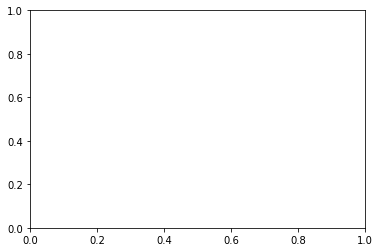

In [5]:
fig, ax = plt.subplots()

## Verify the returned types of `subplots`
Let's verify that we indeed have a Figure and Axes.

In [38]:
type(fig)

matplotlib.figure.Figure

In [39]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

### Distinguishing the Figure from the Axes
It's not obvious, from looking at the plot which part is the Figure and which is the Axes. We will call our first method, **`set_facecolor`** in an object-oriented fashion from both the Figure and Axes objects. We pass it a name of a color (more on colors later). 

In [40]:
fig.set_facecolor('skyblue')
ax.set_facecolor('sandybrown')

### Where is the Figure?
When using the object-oriented approach, you will need to write the Figure variable name as the last line in a cell to view it in the notebook. This should now hopefully distinguish the Figure, from the Axes.

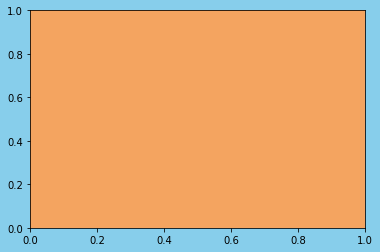

In [41]:
fig

### Why is there no assignment statement?
Notice, that the two calls above to the `set_facecolor` method were made without an assignment statement. Both of these operations happened **in-place**. The calling Figure and Axes objects were updated without a new one getting created.

### Can only view the entire Figure not the Axes
Attempting to view just the Axes, by writing the variable name in a cell will not show it. Only the Figure as a whole will output it.

In [42]:
ax

## Setting the size of the Figure upon creation
The default Figure is fairly small. We can change this when creating it with the `figsize` parameter. Pass a two-item tuple to configure the height and width of the figure. By default, these dimensions are 6 by 4. They represent **inches** and are literally the inches that your figure would be if you printed out on paper.

Below, we create a new Figure that is 12 inches in width by 6 inches in height. We also color the faces of the both the Figure and Axes again.

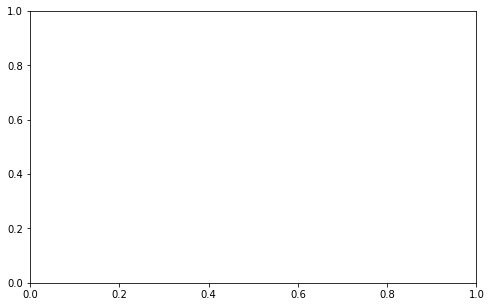

In [10]:
fig,ax = plt.subplots(figsize=(8,5))

## Began the Object-Oriented Approach
Both calls to the `set_facecolor` method demonstrated the object-oriented approach to matplotlib. With this approach, every object that is created may be manipulated by calling methods.

### Latch on to objects and then call their methods
Everything on our plot is a separate object. Each of these objects may be explicitly referenced by a variable. Once we have a reference to a particular object, we can then modify it by calling methods on it.

Thus far we have two references, `fig` and `ax`. There are many other objects on our Axes that we can reference such as the x and y axis, tick marks, tick labels, and others. We do not yet have references to these objects.

## Calling Axes methods - `get_` and `set_` methods
Before we start referencing these other objects, let's change some of the properties of our Axes by calling some methods on it. Many methods begin with either `get_` or `set_` followed by the part of the Axes that will get retrieved or modified. The following list shows several of the most common properties that can be set on our Axes. We will see examples of each one below.

* title
* xlabel/ylabel
* xlim/ylim
* xticks/yticks
* xticklabels/yticklabels

### Getting and setting the title of the Axes
The `get_title` method will return the title of the Axes as a string. There is no title at this moment so it returns an empty string. 

In [11]:
ax.get_title()

''

The `set_title` method will place a centered title on our Axes when passing it a string. Notice that a matplotlib Text object has been returned. More on this later.

In [12]:
ax.set_title('My First Matplotlib Graph')

Text(0.5, 1.0, 'My First Matplotlib Graph')

Again, we must place our Figure variable name as the last line in our cell to show it in our notebook.

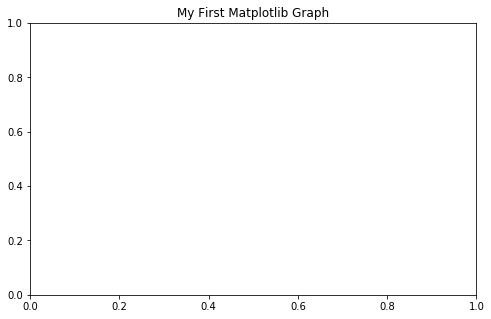

In [14]:
fig

Now, if we run the `get_title` method again, we will get the string that was used as the title.

In [15]:
ax.get_title()

'My First Matplotlib Graph'

### Getting and setting the labels for the x and y axis
By default, the x and y axis labels are not provided and we get returned an empty string when we get them.

In [48]:
ax.get_xlabel()

''

In [49]:
ax.get_ylabel()

''

We can provide labels for both the x and y axis on our Axes using the `set_xlabel` and `set_ylabel` commands. Again, each of these methods return a matplotlib Text object.

In [50]:
ax.set_xlabel('X Axis')

Text(0.5, 3.1999999999999993, 'X Axis')

In [51]:
ax.set_ylabel('Y Axis')

Text(3.200000000000003, 0.5, 'Y Axis')

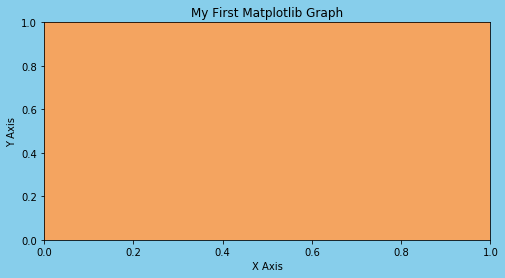

In [52]:
fig

In [53]:
ax.get_xlabel()

'X Axis'

In [54]:
ax.get_ylabel()

'Y Axis'

### Getting and setting the x and y limits
By default, the limits of both the x and y axis are 0 to 1. We can change this with the `set_xlim` and `set_ylim` methods. Pass these methods a new left and right boundary to change the limits. These methods actually return a tuple of the limits.

In [55]:
ax.get_xlim()

(0.0, 1.0)

In [56]:
ax.get_ylim()

(0.0, 1.0)

In [57]:
ax.set_xlim(0, 5)

(0, 5)

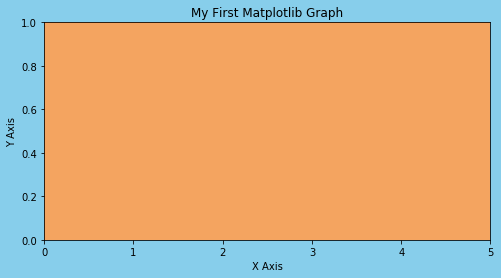

In [58]:
fig

Set the y limits and output the Figure in a single code cell.

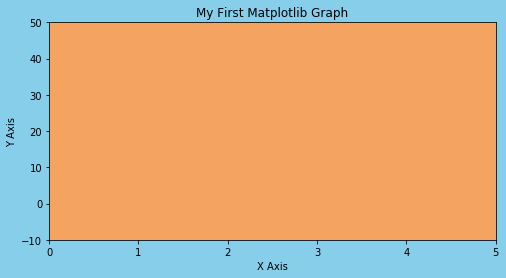

In [59]:
ax.set_ylim(-10, 50)
fig

Notice, that the size of the figure remains the same. Only the limits of the x and y axis have changed.

### Getting and setting the location of the x and y ticks
In the graph above, it has chosen to place ticks every 1 unit for the x and every 10 units for the y. Matplotlib chooses reasonable default values. Let's see the location of these ticks with the `get_xticks` and `get_yticks` methods.

In [60]:
ax.get_xticks()

array([0., 1., 2., 3., 4., 5.])

In [61]:
ax.get_yticks()

array([-10.,   0.,  10.,  20.,  30.,  40.,  50.])

We can specify the exact location of the x and y ticks with the `set_xticks` and `set_ticks` methods. We pass them a list of numbers indicating where we want the ticks. A list of matplotlib XTick or YTick objects get returned. More on these later.

In [62]:
ax.set_xticks([1.8, 3.99, 4.4])

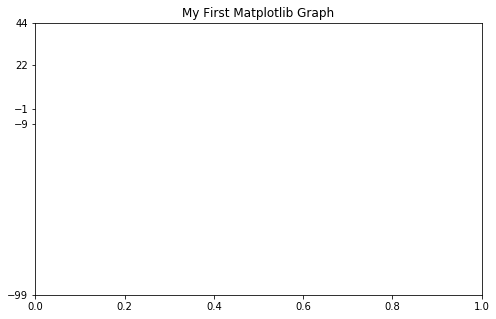

In [17]:
fig

When we set the y-ticks we will use a number outside of the current bounds of the axis. This forces matplotlib to change the limits.

In [16]:
ax.set_yticks([-99, -9, -1, 22, 44])

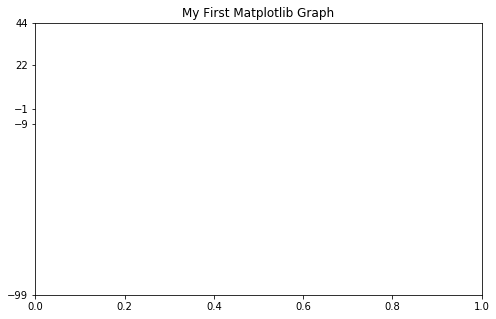

In [18]:
fig

Let's verify that the y-axis limits have indeed changed and that the x-axis limits have not.

In [64]:
ax.get_xlim()

(0.0, 5.0)

In [65]:
ax.get_ylim()

(-10.0, 50.0)

### Getting and setting the x and y tick labels
The current tick labels for the x-axis and y-axis are the same as the tick locations. Let's first view the current tick labels.

In [19]:
ax.get_xticklabels()

<a list of 6 Text xticklabel objects>

For some reason, the tick labels are hidden in some list-like object. To convert it to a list, pass it to the `list` function, which returns a list of matplotlib Text objects. 

In [20]:
list(ax.get_xticklabels())

[Text(0.0, 0, '0.0'),
 Text(0.2, 0, '0.2'),
 Text(0.4, 0, '0.4'),
 Text(0.6000000000000001, 0, '0.6'),
 Text(0.8, 0, '0.8'),
 Text(1.0, 0, '1.0')]

Let's see the y tick labels.

In [68]:
list(ax.get_yticklabels())

[Text(0, -10.0, '−10'),
 Text(0, 0.0, '0'),
 Text(0, 10.0, '10'),
 Text(0, 20.0, '20'),
 Text(0, 30.0, '30'),
 Text(0, 40.0, '40'),
 Text(0, 50.0, '50')]

Pass the `set_xticklabels` method a list of strings to use as the new labels.

In [21]:
ax.set_xticklabels(['dog', 'cat', 'snake'])

[Text(0.0, 0, 'dog'), Text(0.2, 0, 'cat'), Text(0.4, 0, 'snake')]

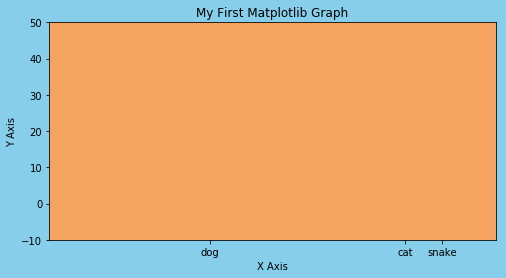

In [70]:
fig

Let's change the y tick labels as well. You actually do not need to provide labels for all of the ticks. Matplotlib will simply make those other tick labels equal to the empty string. We provide just two of the five labels. Notice that the tick **lines** are still present but there are no labels for the remaining three.

In [71]:
ax.set_yticklabels(['Texas', 'Oklahoma'])

[Text(0, -10.0, 'Texas'), Text(0, 0.0, 'Oklahoma')]

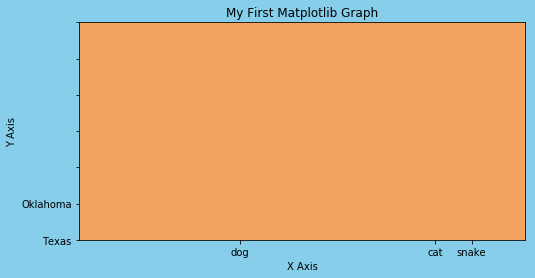

In [72]:
fig

Get the x and y tick labels again.

In [73]:
list(ax.get_xticklabels())

[Text(1.8, 0, 'dog'), Text(3.99, 0, 'cat'), Text(4.4, 0, 'snake')]

In [74]:
list(ax.get_yticklabels())

[Text(0, -10.0, 'Texas'),
 Text(0, 0.0, 'Oklahoma'),
 Text(0, 10.0, ''),
 Text(0, 20.0, ''),
 Text(0, 30.0, ''),
 Text(0, 40.0, ''),
 Text(0, 50.0, '')]

### The difference between the tick locations and labels
The tick locations are a completely separate concept than the tick labels. The tick locations are always numeric and determine where on the plot the tick mark will appear. The tick labels on the other hand are the strings that are used on the graph.

The tick labels are defaulted to be a string of the tick location, but you can set them to be any string you want, as we did above.

### Set the tick locations again 
When we set the tick locations with the `set_xticks` method, the same labels that set before are kept. Here, we use 5 new tick locations instead of the 3 that we had. We did have three tick labels. These labels are used for the first three ticks, but the last two are empty.

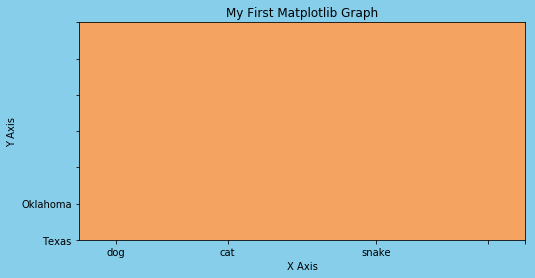

In [75]:
ax.set_xticks([5, 20, 40, 55, 60])
fig

View the tick labels and notice the last two are empty strings.

In [76]:
list(ax.get_xticklabels())

[Text(5, 0, 'dog'),
 Text(20, 0, 'cat'),
 Text(40, 0, 'snake'),
 Text(55, 0, ''),
 Text(60, 0, '')]

### Setting text styles
All the text we placed on our plot was plain. We can add styling to it by changing the text properties. See the documentation for a list of all the [text properties][1]. 

#### Common text properties
* `size` - Number in "points" where 1 point is defaulted to 1/72nd of an inch
* `color` - One of the [named colors][2]. See the [colors API][3] for more.
* `backgroundcolor` - Same as above
* `fontname` - Name of font as a string
* `rotation` - Degree of rotation

[1]: https://matplotlib.org/tutorials/text/text_props.html
[2]: https://matplotlib.org/gallery/color/named_colors.html
[3]: https://matplotlib.org/tutorials/colors/colors.html

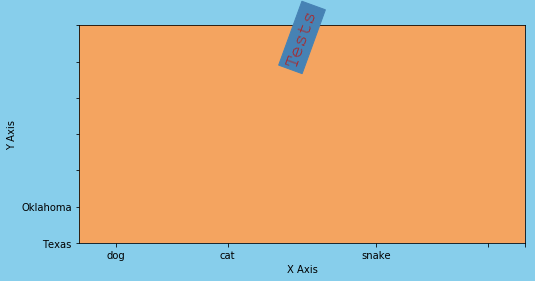

In [77]:
ax.set_title('Tests', 
             size=20, 
             color='firebrick', 
             backgroundcolor='steelblue',
             fontname='Courier New',
             rotation=70)
fig

Any other text may be stylized with those same parameters. Below we do so with the x labels.

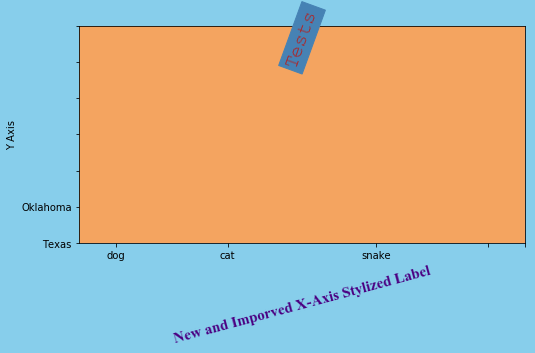

In [78]:
ax.set_xlabel('New and Imporved X-Axis Stylized Label', size=15, 
              color='indigo', fontname='Times New Roman', rotation=15)
fig

## Use the `tick_params` method to set tick line properties
Although there exists a `get_xticklines` method, therer is no `set_xticklines`. Instead, matplotlib has the `tick_params` method to set the properties on the lines themselves. You will need to read the documentation of this method to see all the available parameters that can be used. Below, we specify several properties on the x tick lines.

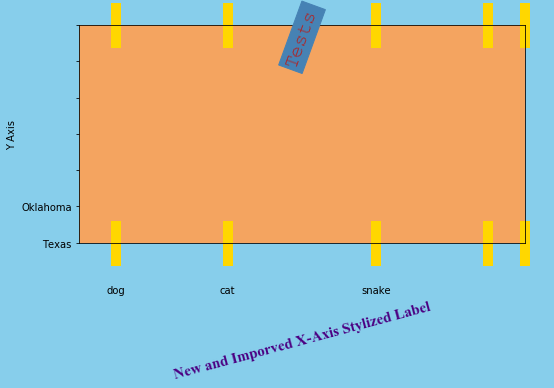

In [79]:
ax.tick_params(axis='x', color='gold', size=45, width=10, 
               direction='inout', pad=20, top=True)
fig

### Set the tick label properties with `tick_params`
You can also set the properties of the **labels** with the `tick_params` method as well.

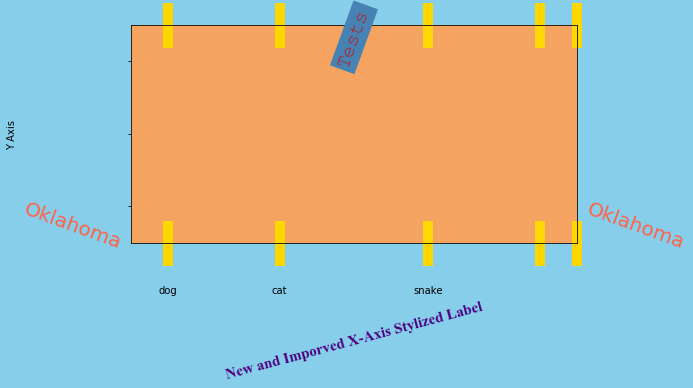

In [80]:
ax.tick_params(axis='y', labelsize=20, labelcolor='tomato', 
               labelrotation=-20, labelright=True)
fig

## Exercise
Create a Figure with a single Axes. Modify the Axes by using all of the methods in this notebook.

* `title`
* `xlabel/ylabel`
* `xlim/ylim`
* `xticks/yticks`
* `xticklabels/yticklabels`
* `tick_params` 

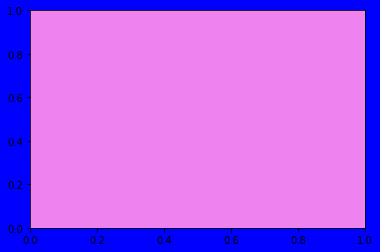

In [125]:
fig,ax = plt.subplots(figsize = (6,4))
fig.set_facecolor('blue')
ax.set_facecolor('violet')

In [126]:
ax.set_title('Settings')

Text(0.5, 1.0, 'Settings')

In [127]:
ax.set_xlabel('X-Axis')

Text(0.5, 3.1999999999999993, 'X-Axis')

In [128]:
ax.set_ylabel('Y-Axis')

Text(3.200000000000003, 0.5, 'Y-Axis')

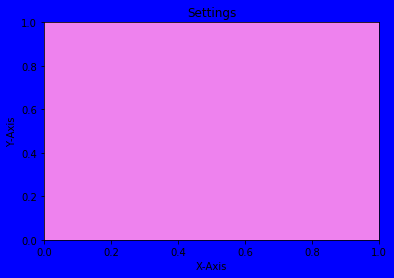

In [129]:
fig

In [130]:
ax.set_xlim(0,5)
ax.set_ylim(0,10)

(0, 10)

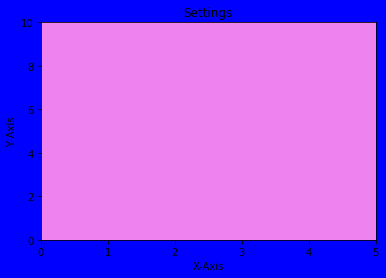

In [131]:
fig

In [132]:
ax.set_xticks([0,1.5,2.5,4.5])

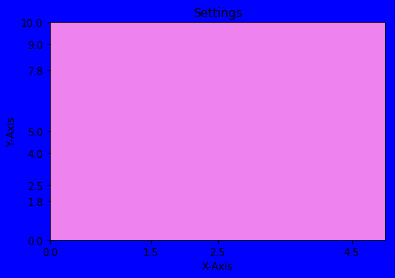

In [133]:
ax.set_yticks([0,1.8,2.5,4,5,7.8,9,10])
fig

In [134]:
ax.set_xlabel('Time')
ax.set_ylabel('capacity')

Text(17.200000000000003, 0.5, 'capacity')

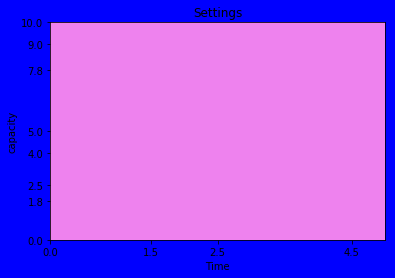

In [135]:
fig

In [136]:
ax.set_yticklabels(['speed1','speed2'])
ax.set_xticklabels(['cat','snake'])

[Text(0.0, 0, 'cat'), Text(1.5, 0, 'snake')]

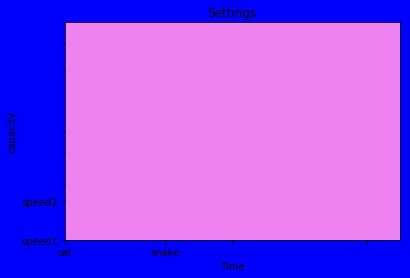

In [138]:
fig

In [139]:
ax.tick_params(axis='x', size=45, width=6,  color='gold',
               direction='inout', pad=20, top=True)

In [140]:
ax.tick_params(axis='y', size=20, width=5,  color='black',
               direction='inout', pad=20)

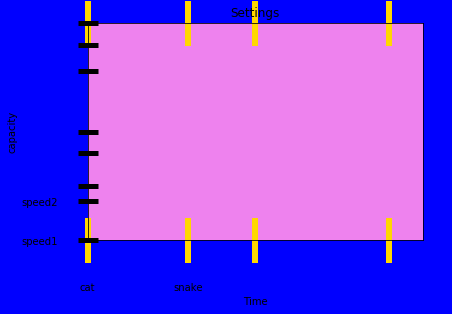

In [141]:
fig